In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Como mencionado no site, o arquivo que vamos analisar é o "ViewingActivity.csv"

fonte: https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

In [2]:
dados = pd.read_csv('ViewingActivity.csv')
dados.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ademilson,2020-11-24 00:15:41,00:03:13,Autoplayed: user action: Unspecified;,Operação Ecstasy: Temporada 2: Empacado (Episó...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:03:41,00:03:41,BR (Brazil)
1,Ademilson,2020-11-23 23:04:25,00:47:00,Autoplayed: user action: Unspecified;,Operação Ecstasy: Temporada 2: Enricochetear (...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:47:51,00:47:51,BR (Brazil)
2,Ademilson,2020-11-23 22:15:45,00:47:35,Autoplayed: user action: Unspecified;,Operação Ecstasy: Temporada 2: Victor (Episódi...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:47:51,00:47:51,BR (Brazil)
3,Ademilson,2020-11-23 21:13:27,00:48:28,Autoplayed: user action: Unspecified;,Operação Ecstasy: Temporada 2: Revolución (Epi...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:48:33,00:48:33,BR (Brazil)
4,Ademilson,2020-11-23 20:58:09,00:15:12,NaN,Operação Ecstasy: Temporada 2: Cavalo de Troia...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:44:50,00:44:50,BR (Brazil)


In [3]:
dados.shape

(4273, 10)

In [4]:
dados['Profile Name'].unique()

array(['Ademilson', 'Maevi', 'William', 'Letícia', 'Beatriz'],
      dtype=object)

## Como toda a família usa a conta da Netflix, vou filtrar pelo meu perfil:

In [5]:
will = dados[dados['Profile Name'] == 'William']

In [6]:
# Removendo as colunas indesejadas:
will = will.drop(['Profile Name','Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [7]:
will.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

## Para análise dos dados, vamos precisar transformar os objetos da coluna StartTime e Duration em DateTime e DeltaTime rescpectivamente para o pandas interpretar como  data e hora:

In [8]:
will['Start Time'] = pd.to_datetime(will['Start Time'], utc=True)

In [9]:
will.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [10]:
# Mudabndo a coluna 'Start Time' para o indice do dataframe
will = will.set_index('Start Time')

# Convertendo o fuso horário para o do Brasil
will.index = will.index.tz_convert('America/Sao_Paulo')

# Revertendo de indice para coluna novamente
will = will.reset_index()

will.head()

,Start Time,Duration,Title
0,2020-11-22 16:27:35-03:00,00:02:58,Os indomáveis
1,2020-11-22 13:29:05-03:00,00:00:28,Clipe 2: O Gambito da Rainha
2,2020-11-22 13:28:55-03:00,00:00:04,Castlevania (Trailer)
3,2020-11-20 21:14:36-03:00,01:32:51,Os indomáveis
4,2020-11-20 21:07:50-03:00,00:00:14,Trailer: O Que Ficou Para Trás


In [11]:
# Transformando a coluna de duração em timedelta
will['Duration'] = pd.to_timedelta(will['Duration'])

will.dtypes

Start Time    datetime64[ns, America/Sao_Paulo]
Duration                        timedelta64[ns]
Title                                    object
dtype: object

In [12]:
will.head()

,Start Time,Duration,Title
0,2020-11-22 16:27:35-03:00,0 days 00:02:58,Os indomáveis
1,2020-11-22 13:29:05-03:00,0 days 00:00:28,Clipe 2: O Gambito da Rainha
2,2020-11-22 13:28:55-03:00,0 days 00:00:04,Castlevania (Trailer)
3,2020-11-20 21:14:36-03:00,0 days 01:32:51,Os indomáveis
4,2020-11-20 21:07:50-03:00,0 days 00:00:14,Trailer: O Que Ficou Para Trás


## Vamos refinar a base de dados, retirando os trailers:

In [13]:
# Retirando os possíveis trailers assistidos
will = will[(will['Duration'] > '0 days 00:03:00')]
will.shape

(207, 3)

# Pronto, agora vamos começar analisando os filmes

In [14]:
# Checando o filme de maior duração
will['Duration'].max()

Timedelta('0 days 02:43:01')

In [15]:
# Ordenando os filmes assistidos com maior duração
filmes = will.sort_values(['Duration'], ascending=False)

# Quero um top 10 filmes mais assistidos

In [16]:
filmes.head(10)

,Start Time,Duration,Title
270,2020-06-01 22:10:09-03:00,0 days 02:43:01,O Resgate do Soldado Ryan
297,2020-05-07 19:40:29-03:00,0 days 02:33:17,Millennium: Os Homens que Não Amavam as Mulheres
61,2020-10-18 17:03:21-03:00,0 days 02:25:26,Cassino
315,2020-05-03 16:20:00-03:00,0 days 02:24:52,Garota Exemplar
96,2020-09-21 22:16:25-03:00,0 days 02:13:24,O Diabo de Cada Dia
273,2020-05-30 23:47:24-03:00,0 days 02:10:47,Até o Último Homem
10,2020-11-15 22:58:21-03:00,0 days 01:51:09,Kick-Ass – Quebrando tudo
90,2020-10-04 22:08:35-03:00,0 days 01:49:25,Blade Runner 2049
239,2020-06-18 23:06:32-03:00,0 days 01:48:17,The Ballad of Buster Scruggs
312,2020-05-03 22:40:46-03:00,0 days 01:44:28,Brilho Eterno de uma Mente sem Lembranças


## Agora sobre as séries mais assistidas, quero saber quando e quantas horas passei assistindo...
Na conta antiga eu sei que meu record era Breaking Bad que eu assisti e reassisti multiplas vezes, porém como essa é uma conta nova, a ultima série que eu maratonei foi Peaky Blinders, então vou analisar a quantidade total assistida dessa série:

In [17]:
# Criando um novo dataframe com apenas as linhas contendo o Título Peaky Blinders
peaky = will[will['Title'].str.contains('Peaky Blinders', regex=False)]
peaky['Duration'].sum()

Timedelta('1 days 03:25:41')

## A quantidade total assistida foi 1 dia, 3 horas, 25 minutos e 41 segundos (eu esperava mais haha)

## Mas quero me aprofundar um pouco mais na análise, vamos ver com as séries separadas em temporada e episódio:

In [18]:
# Copiando os dados e criando uma nova base de dados
series = will

# Criando novas colunas com temporada e episódio de cada série (vamos deixar em inglês para seguir em concordância com o original)
series[['Title_name', 'Season', 'Episode']] = series['Title'].str.split(':', n=2, expand=True)

# Excluindo a coluna Título
series.drop('Title', axis=1, inplace=True)
series.head()

,Start Time,Duration,Title_name,Season,Episode
3,2020-11-20 21:14:36-03:00,0 days 01:32:51,Os indomáveis,None,None
7,2020-11-19 22:39:00-03:00,0 days 01:43:14,As Branquelas,None,None
8,2020-11-19 22:25:04-03:00,0 days 00:07:41,Bastardos Inglórios,None,None
9,2020-11-17 16:03:29-03:00,0 days 00:35:02,O Aviador,None,None
10,2020-11-15 22:58:21-03:00,0 days 01:51:09,Kick-Ass – Quebrando tudo,None,None


## Notamos que os filmes estão aparecendo também, mas queremos apenas as séries

In [19]:
# Vamos excluir os títulos que não possuem Season nem Episode, para filtrar apenas as séries
series.dropna()

,Start Time,Duration,Title_name,Season,Episode
16,2020-11-11 23:07:00-03:00,0 days 00:34:26,O Sangue de Zeus,Temporada 1,Guerra pelo Olimpo (Episódio 8)
17,2020-11-11 22:48:06-03:00,0 days 00:13:32,O Sangue de Zeus,Temporada 1,Território dos mortos (Episódio 7)
18,2020-11-10 00:57:11-03:00,0 days 00:17:40,O Sangue de Zeus,Temporada 1,Território dos mortos (Episódio 7)
19,2020-11-10 00:21:36-03:00,0 days 00:29:38,O Sangue de Zeus,Temporada 1,De volta ao Olimpo (Episódio 6)
21,2020-11-08 00:05:42-03:00,0 days 00:23:07,O Sangue de Zeus,Temporada 1,Fugir ou morrer (Episódio 5)
...,...,...,...,...,...
413,2020-04-03 01:07:42-03:00,0 days 00:53:31,Peaky Blinders,"Sangue, Apostas e Navalhas",Temporada 1: Episódio 6 (Episódio 6)
414,2020-04-02 23:48:41-03:00,0 days 00:55:54,Peaky Blinders,"Sangue, Apostas e Navalhas",Temporada 1: Episódio 5 (Episódio 5)
415,2020-04-02 22:35:19-03:00,0 days 00:57:54,Peaky Blinders,"Sangue, Apostas e Navalhas",Temporada 1: Episódio 4 (Episódio 4)
416,2020-04-02 00:13:01-03:00,0 days 00:54:25,Peaky Blinders,"Sangue, Apostas e Navalhas",Temporada 1: Episódio 3 (Episódio 3)


## Pronto, agora vou expandir a coluna StartTime para dias da semana e horas do dia (a semana começa em 0=Segunda e vai até 6=Domingo):

In [20]:
# Criando novas colunas usando o datetime
series['Weekday'] = series['Start Time'].dt.weekday
series['Hour'] = series['Start Time'].dt.hour

series.head()

,Start Time,Duration,Title_name,Season,Episode,Weekday,Hour
3,2020-11-20 21:14:36-03:00,0 days 01:32:51,Os indomáveis,None,None,4,21
7,2020-11-19 22:39:00-03:00,0 days 01:43:14,As Branquelas,None,None,3,22
8,2020-11-19 22:25:04-03:00,0 days 00:07:41,Bastardos Inglórios,None,None,3,22
9,2020-11-17 16:03:29-03:00,0 days 00:35:02,O Aviador,None,None,1,16
10,2020-11-15 22:58:21-03:00,0 days 01:51:09,Kick-Ass – Quebrando tudo,None,None,6,22


## Vamos ver quantas vezes foi dado play em cada série:

In [21]:
series['Title_name'].value_counts().head()

Peaky Blinders                                 32
Baki - O Campeão                               16
Narcos                                         14
Rick and Morty                                 12
Grandes Momentos da Segunda Guerra em Cores     9
Name: Title_name, dtype: int64

## Agora um top 10 séries mais assistidas:

In [22]:
# Mapeando as séries de acordo com sua duração máxima
series.groupby(['Title_name']).agg({'Duration':'sum'}).sort_values(by='Duration', ascending=False).head(10)

,Duration
Title_name,
Peaky Blinders,1 days 03:25:41
Narcos,0 days 09:16:24
Better Call Saul,0 days 05:21:21
Vikings,0 days 05:16:30
Grandes Momentos da Segunda Guerra em Cores,0 days 04:29:38
Sherlock,0 days 04:22:05
Bárbaros,0 days 04:09:32
Como vender drogas online (rápido),0 days 03:52:36
Rick and Morty,0 days 03:51:16


## Poderia filtrar por episódio/temporada mais assistido(a), porém não tenho costume de assistir mais de uma vez...

## Vamos ver quais dias da semana eu mais assisto séries:

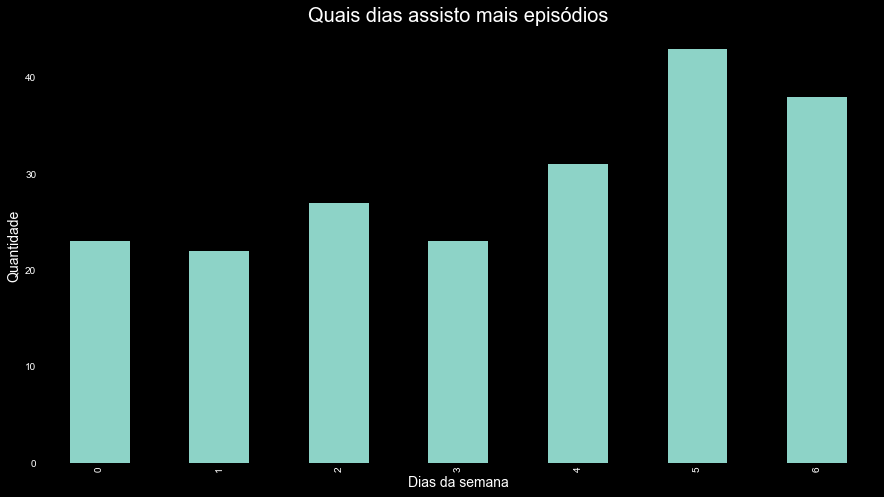

In [47]:
# Definindo a ordem de dias da semana Segunda-Domingo
series['Weekday'] = pd.Categorical(series['Weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

# Criando uma variável e guardando a quantidade
series_por_dia = series['Weekday'].value_counts()

# Ordenando os dias da semana pelo indice (Segunda=0 até Domingo=6)
series_por_dia = series_por_dia.sort_index()

# Plotando no gráfico
plt.style.use("dark_background")
plt.title('Quais dias assisto mais episódios', fontsize=20)
plt.xlabel('Dias da semana', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

series_por_dia.plot(kind='bar', figsize=(15, 8))

fig1 = plt.gcf()
fig1.savefig('Analise_netflix.png')
plt.show()

## Como imaginado, aos finais de semana são quando eu maratono minhas séries hehe

## Agora vamos ver qual a hora do dia que eu costumo assistir:

<AxesSubplot:title={'center':'Quais horários assisto mais episódios'}, xlabel='Horas do dia', ylabel='Quantidade'>

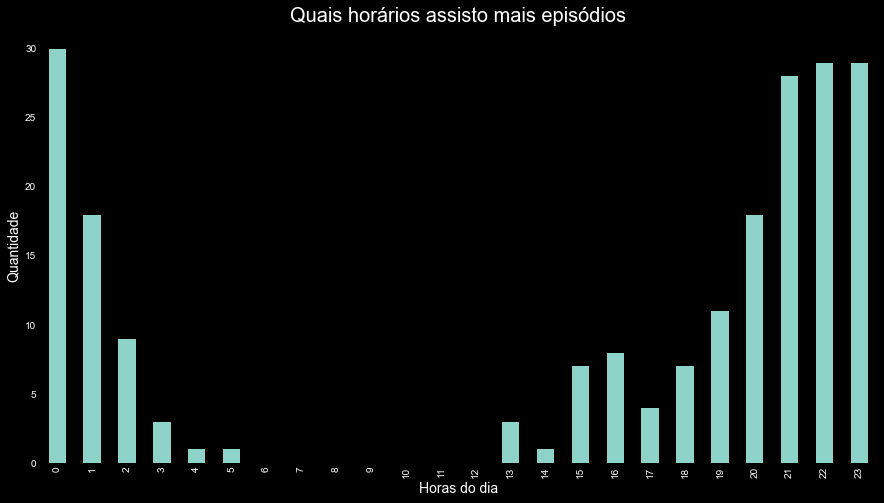

In [46]:
# Ordenando os horários de 0 até 23 horas
series['Hour'] = pd.Categorical(series['Hour'], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

# Criando uma variável e guardando a quantidade
series_por_hora = series['Hour'].value_counts()

# Ordenando o índice começando por meia-noite(0) e assim por diante
series_por_hora = series_por_hora.sort_index()

# Plotando no gráfico
plt.title('Quais horários assisto mais episódios', fontsize=20)
plt.xlabel('Horas do dia', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
series_por_hora.plot(kind='bar', figsize=(15, 8))

## E por fim, os horários que eu mais assisto é entre 20:00 e 01:00